In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10p0mm",
     "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "2Mu2E_1000GeV_5p0GeV_40p0mm"
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 #max_files =10
                                 #max_files =1
                                )
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=2,
    skipbadfiles=True
)

channels = ["baseNoLj", 
           "baseNoLj_A_ee_highPtA_lowLxyA",
            "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"],
    lj_reco_choices=["0.4"],
   
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [3]:
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA"



/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


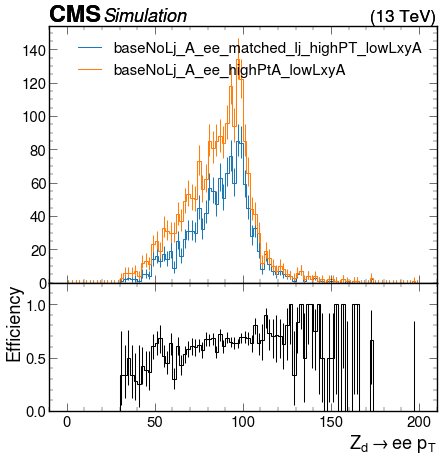

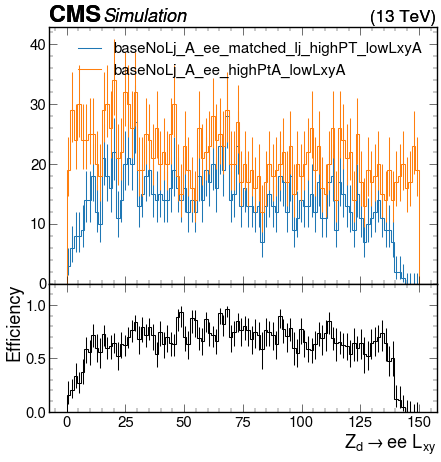

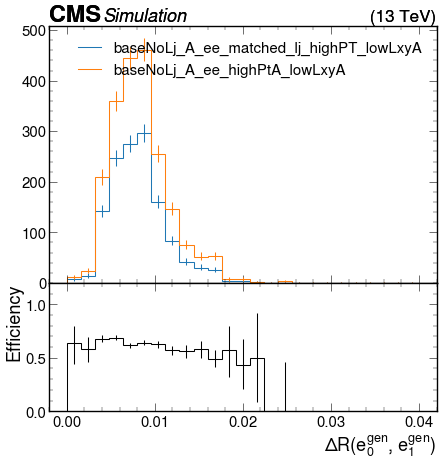

In [4]:
hists = output["out"]["2Mu2E_200GeV_0p25GeV_10p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt"][ch2, :],
           hists["genAs_toE_pt"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XXLowRange"][ch2, ::2j],
           hists["genE_genE_dR_XXLowRange"][ch1, ::2j], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


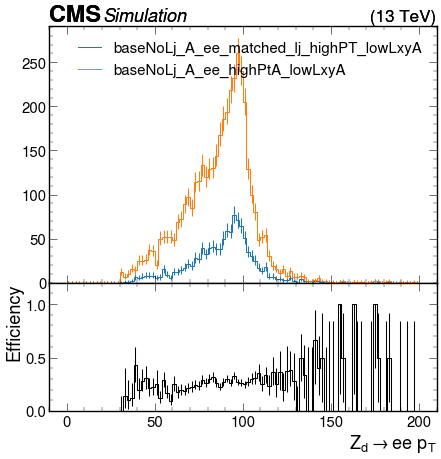

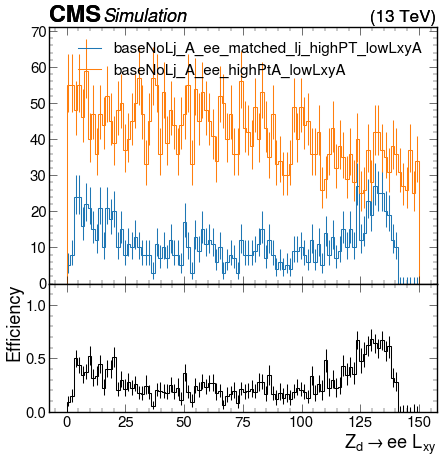

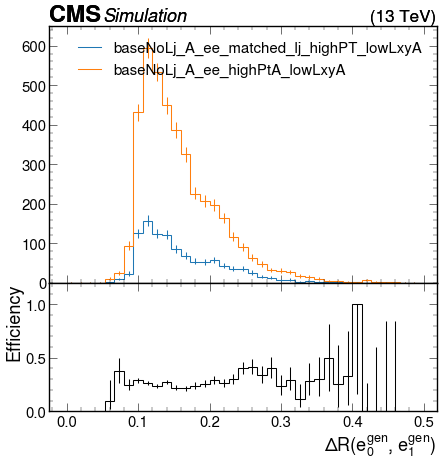

In [5]:
hists = output["out"]["2Mu2E_200GeV_5p0GeV_200p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt"][ch2, :],
           hists["genAs_toE_pt"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_lowRange"][ch2, ::2j],
           hists["genE_genE_dR_lowRange"][ch1, ::2j], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


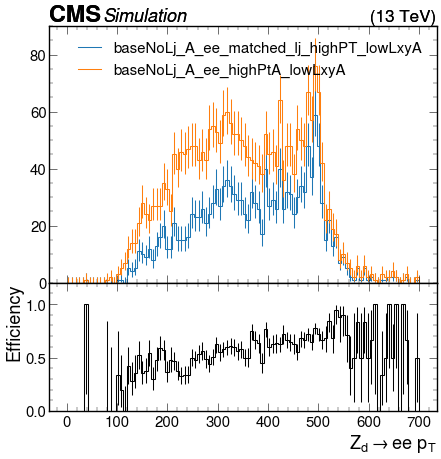

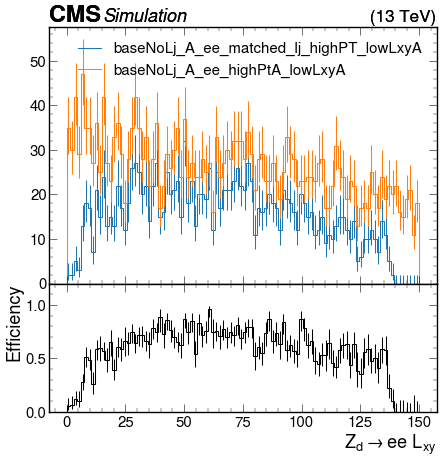

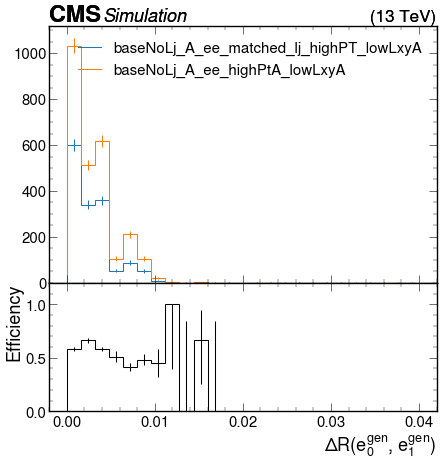

In [6]:
hists = output["out"]["2Mu2E_1000GeV_0p25GeV_2p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch2, :],
           hists["genAs_toE_pt_highRange"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XXLowRange"][ch2, ::2j],
           hists["genE_genE_dR_XXLowRange"][ch1, ::2j], 
          legend = [ch2, ch1])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:142: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


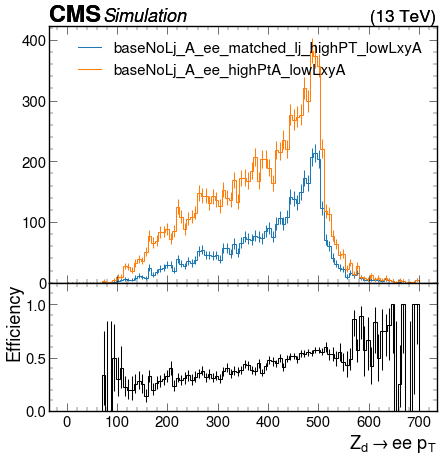

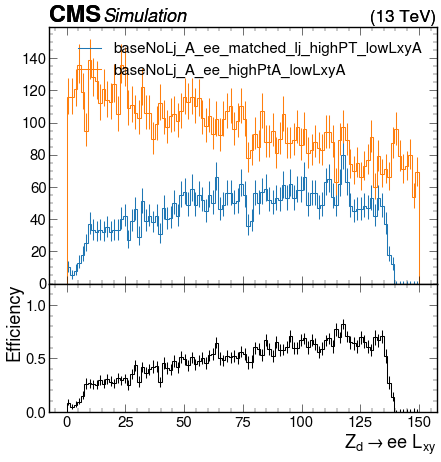

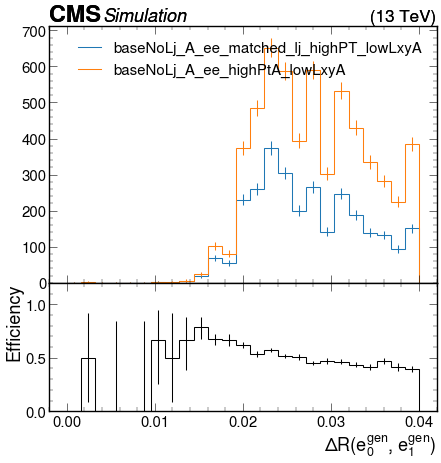

In [7]:
hists = output["out"]["2Mu2E_1000GeV_5p0GeV_40p0mm"]["hists"]
utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch2, :],
           hists["genAs_toE_pt_highRange"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch2, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XXLowRange"][ch2, ::2j],
           hists["genE_genE_dR_XXLowRange"][ch1, ::2j], 
          legend = [ch2, ch1])